In [158]:
import numpy as np

import gensim
from gensim.models import word2vec

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [159]:
model_ru = gensim.models.KeyedVectors.load_word2vec_format('ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz')

In [160]:
for word, sim in model_ru.most_similar(positive=['рыба_NOUN'], topn=3):
    print(f"{word}: {sim}")

креветка_NOUN: 0.7319517135620117
окунь_NOUN: 0.724557101726532
пикша_NOUN: 0.7210602760314941


In [161]:
model_ru.most_similar(positive=['мать_NOUN', 'бабушка_NOUN'], negative=['отец_NOUN'])[0][0]

'тетка_NOUN'

In [162]:
model_ru.doesnt_match(['палец_NOUN', 'рука_NOUN', 'нога_NOUN', 'голова_NOUN'])

'голова_NOUN'

In [191]:
keys = ['москва_NOUN', 'рука_NOUN', 'ремесло_NOUN', 'человек_NOUN', 'голова_NOUN', 'животное_NOUN']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_ru.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model_ru[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=100)
embeddings = np.array(tsne_model.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(12, 8))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                             textcoords='offset points', ha='right', va='top', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

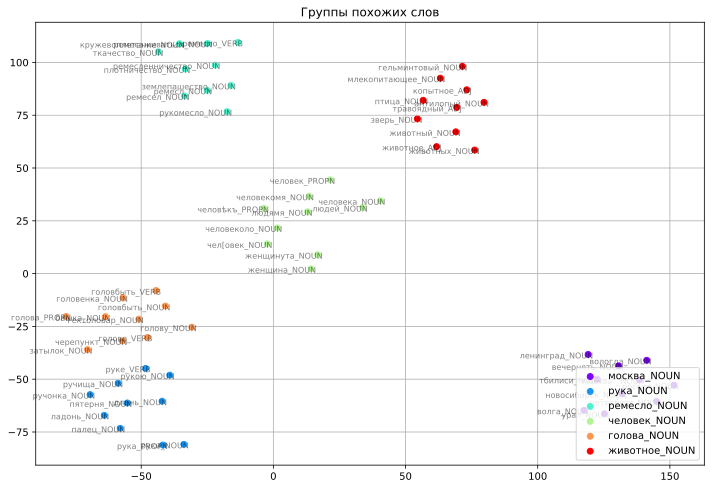

In [192]:
tsne_plot_similar_words('Группы похожих слов', keys, embeddings, word_clusters, 1)